<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/2021notebooks/2021_0625_CycleGAN_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CycleGAN による フェイク画像の生成
- date: 2021_0625
- Original: [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix)

# インストール (Install)

In [ ]:
#GitHub からコードを持ってきます
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2337, done.
remote: Total 2337 (delta 0), reused 0 (delta 0), pack-reused 2337
Receiving objects: 100% (2337/2337), 8.09 MiB | 14.36 MiB/s, done.
Resolving deltas: 100% (1499/1499), done.


In [ ]:
#上で持ってきた GitHub のコードを用いて必要なライブラリをインストールする準備
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
#必要なライブラリのインストール
!pip install -r requirements.txt

# データセットのダウンロード (Datasets)

CycleGAN の公式データセット集からダウンロードします。
ダウンロードできるデータセットは，以下のうちから一つ選びます:
- apple2orange, リンゴからオレンジへの変換
- summer2winter_yosemite,  ヨセミテ公園の夏から冬への変換
- horse2zebra, ウマからシマウマへの変換
- monet2photo, モネの絵画から写真への変換
- cezanne2photo, セザンヌの絵画から写真への変換
- ukiyoe2photo, 浮世絵から写真への変換
- vangogh2photo, ゴッホの絵画から写真への変換
- maps, 地図
- cityscapes, 市街図
- facades, ビルの正面図
- iphone2dslr_flower, 
- ae_photos

<!-- 
Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]` 
-->

あるいは，自分でデータを集めて試すこともできます。
その場合には，次の手順が必要です:
- `/dataset` フォルダの下に自分のデータセットフォルダを作成する
- `testA`, `testB`, `trainA`, `trainB` という下位フォルダを作成する
- a から b へ変換するための，訓練データ画像とテストデータ画像とを，上に挙げたの下位フォルダの下に置きます。

<!-- Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders. -->

In [ ]:
#!bash ./datasets/download_cyclegan_dataset.sh horse2zebra
!bash ./datasets/download_cyclegan_dataset.sh ukiyoe2photo

Specified [ukiyoe2photo]
for details.

--2021-06-24 02:45:40--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/ukiyoe2photo.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.244.190
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 292946532 (279M) [application/zip]
Saving to: ‘./datasets/ukiyoe2photo.zip’

               ./da   5%[>                   ]  15.16M   306KB/s    eta 17m 3s ^C


# 訓練済モデルのダウンロード (Pretrained models)

訓練済モデルをダウンロードします:
ダウンロードするモデルは，上のデータセットに対応している必要があります

<!-- Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]` -->

あるいは，自分のモデルを試す場合には，自分で訓練したパラメータファイルを `./checkpoints/{NAME}_pretrained/latest_net_G.pt`
に置きます。

<!-- 
Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt` -->

浅川による注記: 2021年6月現在，以下の訓練済モデルが使えるようです:

- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/apple2orange.pth
- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/cityscapes_label2photo.pth
- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/cityscapes_photo2label.pth
- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/facades_label2photo.pth
- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/facades_photo2label.pth
- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/horse2zebra.pth
- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/iphone2dslr_flower.pth
- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/map2sat.pth
- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/monet2photo.pth
- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/orange2apple.pth
- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/sat2map.pth
- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_cezanne.pth
- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_monet.pth
- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_ukiyoe.pth
- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_vangogh.pth
- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/summer2winter_yosemite.pth
- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/winter2summer_yosemite.pth
- http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/zebra2horse.pth


In [ ]:
#!bash ./scripts/download_cyclegan_model.sh horse2zebra
!bash ./scripts/download_cyclegan_model.sh style_ukiyoe

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_ukiyoe]
for details.

--2021-06-24 02:57:42--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_ukiyoe.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/style_ukiyoe_pretrained/latest_net_G.pth’

./checkpoints/style 100%[===================>]  43.46M  1.15MB/s    in 76s     

2021-06-24 02:59:01 (588 KB/s) - ‘./checkpoints/style_ukiyoe_pretrained/latest_net_G.pth’ saved [45575747/45575747]



# 訓練 (Training)

以下のオンラインコマンドを実行します

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

ここで，`--dataroot` と `--name` とを自分のモデルに合わせて変更してください。

<!-- 
Change the `--dataroot` and `--name` to your own dataset's path and model's name. 
Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. 
I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s. -->


モデルの訓練が終わったら，最後のチェックポイントを、テストモデルが自動的に検出できるフォーマットに上書きコピーします。

- クラス A からクラス B に画像を変換したい場合は、`cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` としてください。
- 反対に クラス B からクラス A に画像を変換したい場合は、`cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` としてください。

<!-- 
Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A. -->


In [ ]:
# 今回は時間がかかるので訓練を行いません。
# 次に進んでください。訓練を行う場合には，次行の行頭の # を削除して本セルを実行してください
#!python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan

# テストデータによる検証 (Testing)

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

自分で選んだデータに合わせて，`--dataroot` と `--name` を変更してください

<!-- Change the `--dataroot` and `--name` to be consistent with your trained model's configuration. -->

> `https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix` より引用:
> `--model test` オプション を指定すると CycleGAN の結果を片側だけで生成します。
このオプションを指定すると 自動的に `--dataset_mode single` が設定されます。
この場合，片方のデータセットからのみ画像を読み込むようになります。
逆に、`--model cycle_gan` オプションを使うと、両方向の結果をロードして生成する必要があります。
ですが，このオプションは不要な場合もあります。
結果は `./results/` フォルダに保存されます。
結果のディレクトリを指定するには `--results_dir {結果を保存するフォルダ名}` を使います。

<!-- 
> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory. -->

> 自作のデータで実験するには --netG, --norm, --no_dropout を指定して、学習したモデルの生成器アーキテクチャに合わせるのもいいかもしれません。

<!-- > For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model. -->

In [ ]:
#!ls -lt ../datasets/ukiyoe2photo/testA
#!ls ../checkpoints

In [ ]:
#!python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout
!python test.py --dataroot ../datasets/ukiyoe2photo/testA --name style_ukiyoe_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ../datasets/ukiyoe2photo/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# 結果の視覚化 (Visualize)

In [ ]:
!ls results/style_ukiyoe_pretrained/test_latest/images/

01200_fake.png	01210_fake.png	01220_fake.png	01231_fake.png	01241_fake.png
01200_real.png	01210_real.png	01220_real.png	01231_real.png	01241_real.png
01201_fake.png	01211_fake.png	01221_fake.png	01232_fake.png	01242_fake.png
01201_real.png	01211_real.png	01221_real.png	01232_real.png	01242_real.png
01202_fake.png	01212_fake.png	01222_fake.png	01233_fake.png	01243_fake.png
01202_real.png	01212_real.png	01222_real.png	01233_real.png	01243_real.png
01203_fake.png	01213_fake.png	01223_fake.png	01234_fake.png	01244_fake.png
01203_real.png	01213_real.png	01223_real.png	01234_real.png	01244_real.png
01204_fake.png	01214_fake.png	01224_fake.png	01235_fake.png	01245_fake.png
01204_real.png	01214_real.png	01224_real.png	01235_real.png	01245_real.png
01205_fake.png	01215_fake.png	01225_fake.png	01236_fake.png	01246_fake.png
01205_real.png	01215_real.png	01225_real.png	01236_real.png	01246_real.png
01206_fake.png	01216_fake.png	01227_fake.png	01237_fake.png	01247_fake.png
01206_real.png	01216_real

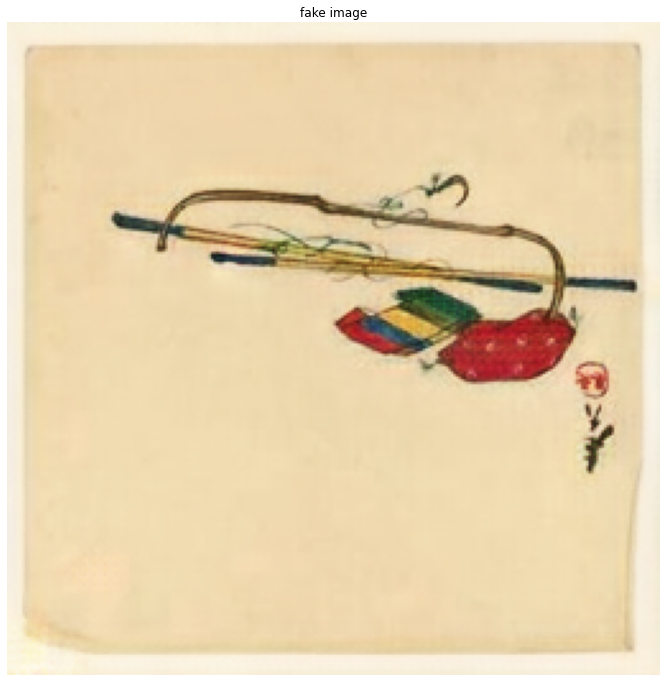

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_ukiyoe_pretrained/test_latest/images/01200_fake.png')
#img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1010_fake.png')
plt.figure(figsize=(12,12))
plt.axis('off')
plt.title('fake image')
plt.imshow(img)

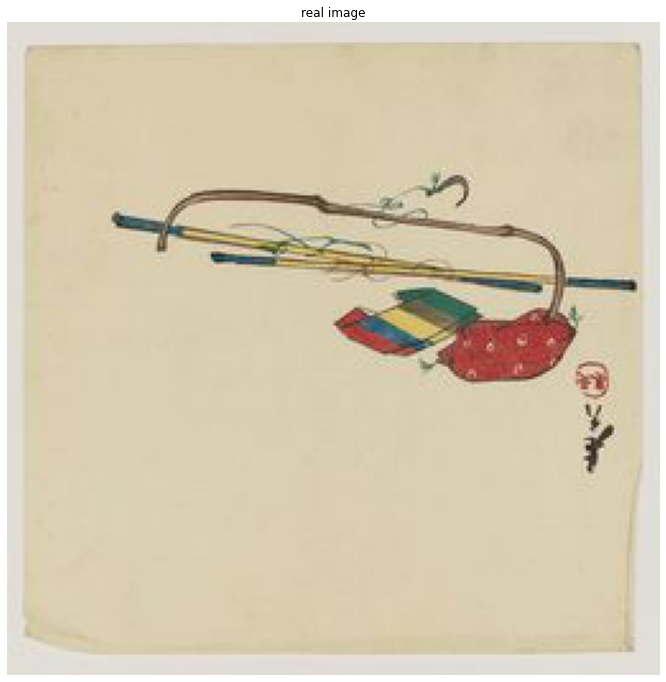

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_ukiyoe_pretrained/test_latest/images/01200_real.png')
#img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1010_real.png')
plt.figure(figsize=(12,12))
plt.axis('off')
plt.title('real image')
plt.imshow(img)